# Projet 2

In [11]:
import pyvista as pv
import dolfinx
from dolfinx import mesh, fem, plot, io, default_scalar_type
from dolfinx.fem.petsc import LinearProblem
from mpi4py import MPI
import ufl
import numpy as np
import gmsh
import meshio
from dolfinx.io import XDMFFile

import dolfinx.fem as fem
import dolfinx.mesh as mesh
from petsc4py import PETSc

# Initialisation de GMSH
gmsh.initialize()
gmsh.model.add("cylindre")

lc = 0.1    # Longueur caractéristique des éléments en mètres

# Créer un cylindre
#gmsh.model.occ.addCylinder(0, 0, 0, 0, 0, height, radius)

#gmsh.model.occ.addCylinder(0, 0, 0, 0, 0, height, radius)
# Exemple avec les dimensions spécifiques
a = 0  # Coordonnée x du coin inférieur gauche
b = 0  # Coordonnée y du coin inférieur gauche
L = 1 # Longueur dans la direction z
width = 0.2  # Largeur dans la direction x
height = 0.2  # Hauteur dans la direction y

gmsh.model.occ.addBox(a, b, 0, width, height, L)

# Synchronisation de la géométrie
gmsh.model.occ.synchronize()

# Définir les tailles des éléments
gmsh.option.setNumber("Mesh.CharacteristicLengthMin", lc)
gmsh.option.setNumber("Mesh.CharacteristicLengthMax", lc)

# Générer le maillage
gmsh.model.mesh.generate(3)  # 3 pour le maillage en 3D

# Sauvegarder le maillage dans un fichier .msh
gmsh.write("cylindre.msh")

# Finaliser GMSH
gmsh.finalize()

# Lire le fichier .msh avec meshio
msh = meshio.read("cylindre.msh")

# Sauvegarder le maillage en format XDMF
meshio.write("cylindre.xdmf", meshio.Mesh(points=msh.points, cells={"tetra": msh.cells_dict.get("tetra", [])}))

# Lire le fichier .xdmf avec Dolfinx
with XDMFFile(MPI.COMM_WORLD, "cylindre.xdmf", "r") as xdmf_file:
    domain = xdmf_file.read_mesh(name="Grid")
    domain.topology.create_connectivity(domain.topology.dim-1, domain.topology.dim)

# Afficher des informations sur le maillage
print("Maillage créé avec succès.")
print(f"Nombre de sommets : {domain.topology.index_map(domain.topology.dim).size_global}")
print(f"Nombre d'éléments : {domain.topology.index_map(domain.topology.dim-1).size_global}")

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 20%] Meshing curve 3 (Line)
Info    : [ 30%] Meshing curve 4 (Line)
Info    : [ 40%] Meshing curve 5 (Line)
Info    : [ 50%] Meshing curve 6 (Line)
Info    : [ 60%] Meshing curve 7 (Line)
Info    : [ 60%] Meshing curve 8 (Line)
Info    : [ 70%] Meshing curve 9 (Line)
Info    : [ 80%] Meshing curve 10 (Line)
Info    : [ 90%] Meshing curve 11 (Line)
Info    : [100%] Meshing curve 12 (Line)
Info    : Done meshing 1D (Wall 0.00103104s, CPU 0.001288s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : [ 20%] Meshing surface 2 (Plane, Frontal-Delaunay)
Info    : [ 40%] Meshing surface 3 (Plane, Frontal-Delaunay)
Info    : [ 60%] Meshing surface 4 (Plane, Frontal-Delaunay)
Info    : [ 70%] Meshing surface 5 (Plane, Frontal-Delaunay)
Info    : [ 90%] Meshing surface 6 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.00432217s

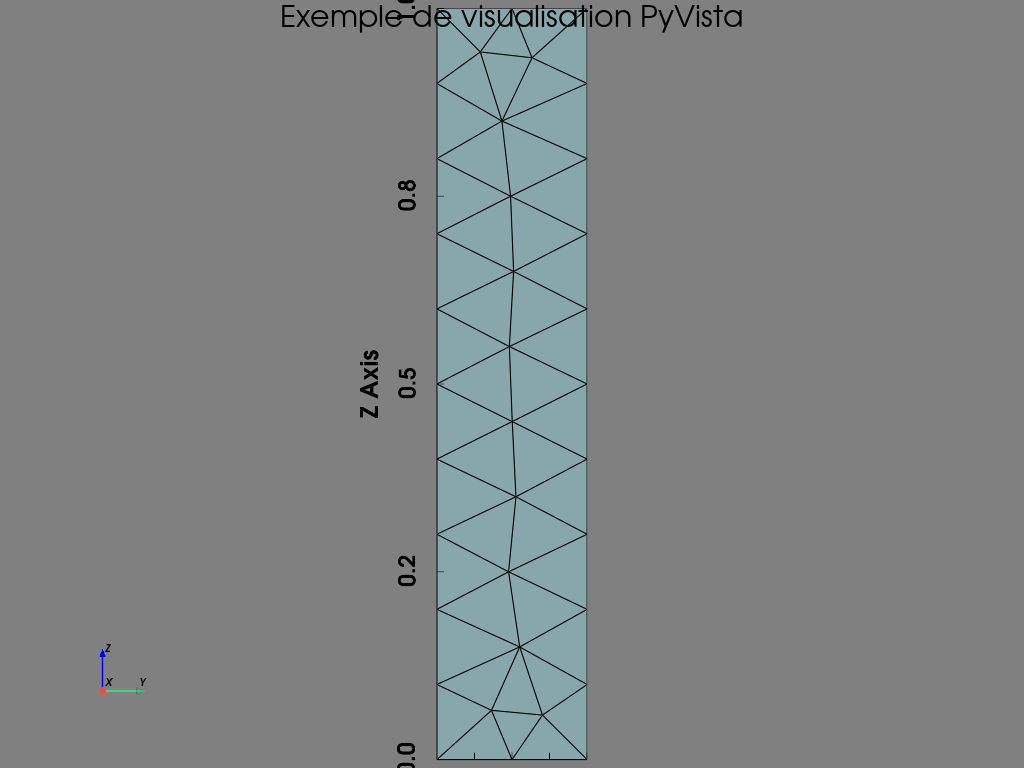

In [22]:
import pyvista as pv
import panel as pn

# Charger l'extension Panel
pn.extension()

# Préparer les données (remplace par tes données réelles)
# Préparer les données (remplace par tes données)
u_topology, u_cell_types, u_geometry = plot.vtk_mesh(domain)
grid = pv.UnstructuredGrid(u_topology, u_cell_types, u_geometry)
# Pour les besoins de cet exemple, nous allons créer un maillage aléatoire
#grid = pv.UnstructuredGrid()

# Configurer le Plotter PyVista
p = pv.Plotter(notebook=True)
p.add_mesh(grid, show_edges=True, scalar_bar_args={
    "title": "u",
    "title_font_size": 24,
    "label_font_size": 22,
    "shadow": True,
    "italic": True,
    "font_family": "arial",
    "vertical": False
})
# Ajout d'un maillage exemple
#p.add_mesh(grid, show_edges=True, scalar_bar_args={"title": "Example Scalar Bar"})
p.add_text("Exemple de visualisation PyVista", font_size=12, color="black", position="upper_edge")
p.show_bounds(color="black")
p.add_axes(color="black")
p.set_background("grey")
p.view_yz()

# Afficher avec le backend Panel
p.show(jupyter_backend='panel')


In [23]:
import panel as pn

# Charger l'extension Panel
pn.extension()

# Simple test widget
slider = pn.widgets.FloatSlider(name='Test Slider', start=0, end=10, step=0.1)
slider

FloatSlider(end=10, name='Test Slider')